# Basic Momentum Strategy Implementation

Following code shows implementation of basic momentum strategy. If the 9-day momentum is faster than the 21-day momentum, long the stock. If 9-day momentum is slower, short stock.

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

In [12]:
end = '2024-07-19'
start = pd.to_datetime(end) - pd.DateOffset(5*365)
gld = yf.download('GLD', start=start, end=end)

day = np.arange(1, len(gld)+1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [20]:
#Shifting to avoid rolling window bias
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()
gld[20:25]

,Open,High,Low,Close,day,9-day,21-day
Date,,,,,,,
2019-08-19,141.330002,141.789993,140.850006,141.110001,21,141.840000,NaN
2019-08-20,141.770004,142.259995,141.600006,142.210007,22,142.084444,138.097618
2019-08-21,141.619995,142.169998,141.460007,141.759995,23,142.216666,138.467143
2019-08-22,141.389999,141.899994,141.169998,141.399994,24,142.220000,138.851428
2019-08-23,141.839996,144.330002,141.639999,144.169998,25,142.235555,139.186190


In [47]:
# If 9 day is larger than the 21 day, sign is positive, else negative. 
gld['signal'] = np.sign(gld['9-day']-gld['21-day'])
gld.dropna(inplace=True)

gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['signal_diff'] = gld.signal.diff()


In [45]:
gld.head()

,Open,High,Low,Close,day,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2019-08-23,141.839996,144.330002,141.639999,144.169998,25,142.235555,139.186190,1.0,NaN,NaN,NaN
2019-08-26,144.350006,144.970001,143.910004,144.190002,26,142.406665,139.698095,1.0,0.000139,0.000139,0.0
2019-08-27,144.300003,145.679993,144.270004,145.570007,27,142.674444,140.200476,1.0,0.009525,0.009525,0.0
2019-08-28,145.389999,145.679993,144.639999,145.160004,28,142.987778,140.726190,1.0,-0.002821,-0.002821,0.0
2019-08-29,145.399994,145.490005,143.279999,144.119995,29,143.150001,141.210953,1.0,-0.007190,-0.007190,0.0


/tmp/ipykernel_976431/3547665358.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(gld[-251:][gld['signal_diff'] == 2].index, gld[-251:]['9-day'][gld['signal_diff']==2], '^', color ='green')
/tmp/ipykernel_976431/3547665358.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(gld[-251:][gld['signal_diff'] == -2].index, gld[-251:]['9-day'][gld['signal_diff']==-2], 'v', color ='red')


Text(0.5, 1.0, 'Gold ETF w/ Momentum Indicators')

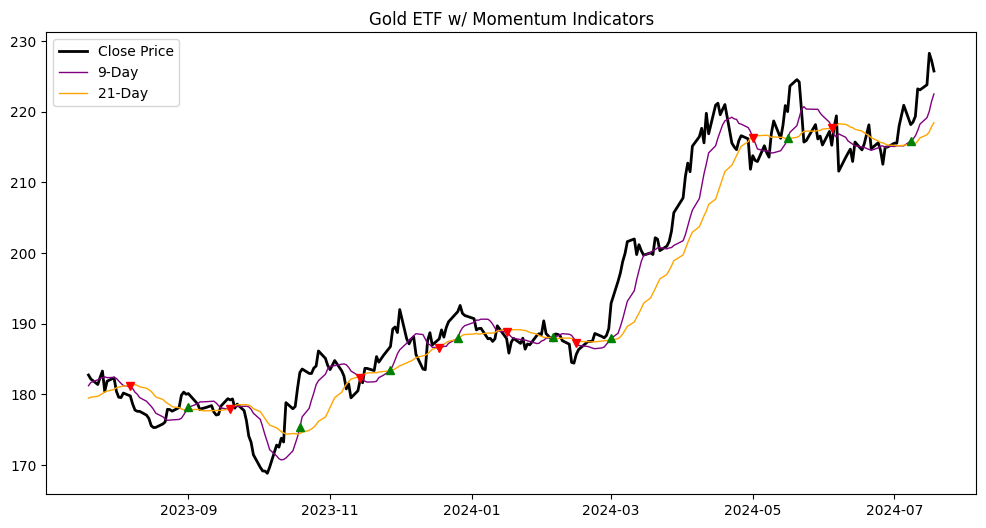

In [72]:
#Plotting Indicators when system should short vs long stock. 
plt.plot(gld.index[-251:], gld['Close'][-251:], lw=2, color='Black', label='Close Price')
plt.plot(gld.index[-251:],gld['9-day'][-251:], lw=1, color='Purple', label='9-Day')
plt.plot(gld.index[-251:],gld['21-day'][-251:], lw=1, color='Orange', label='21-Day')
plt.plot(gld[-251:][gld['signal_diff'] == 2].index, gld[-251:]['9-day'][gld['signal_diff']==2], '^', color ='green')
plt.plot(gld[-251:][gld['signal_diff'] == -2].index, gld[-251:]['9-day'][gld['signal_diff']==-2], 'v', color ='red')
plt.legend(loc=2)
plt.title("Gold ETF w/ Momentum Indicators")

Text(0.5, 1.0, 'Model vs Hold strategy outcome')

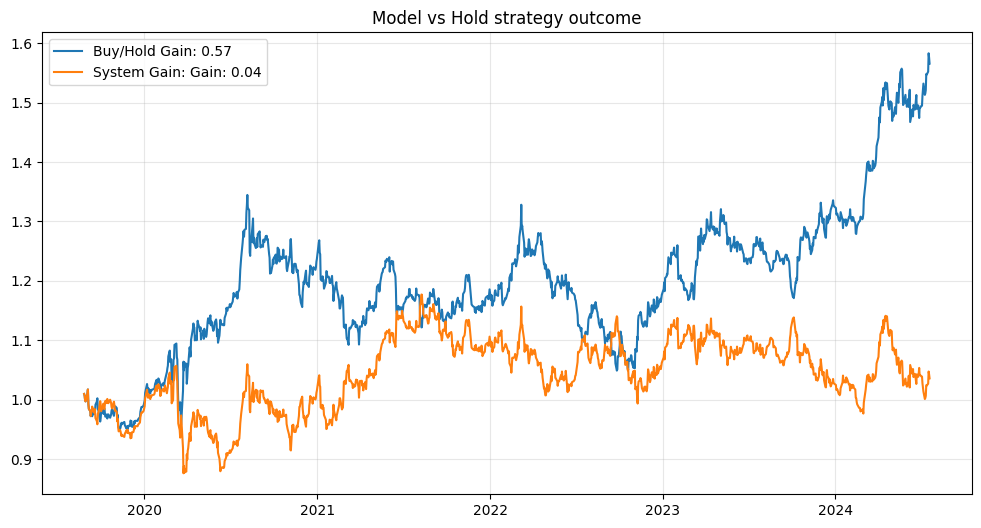

In [90]:
plt.plot(np.exp(gld['return']).cumprod(), label=f"Buy/Hold Gain: {round(np.exp(gld['return']).cumprod()[-1]-1, 2)}")
plt.plot(np.exp(gld['system_return']).cumprod(), label=f"System Gain: Gain: {round(np.exp(gld['system_return']).cumprod()[-1]-1, 2)}")
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.title("Model vs Hold strategy outcome")

In [82]:
np.exp(gld['system_return']).cumprod()[-1] -1

0.03580842949391827